In [1]:
import pandas as pd,numpy as np,openml

In [2]:
dataset, dataset1 = openml.datasets.get_dataset(41214), openml.datasets.get_dataset(41215)

In [3]:
df1, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format="dataframe", target=dataset.default_target_attribute)

In [4]:
df2, y, categorical_indicator, attribute_names = dataset1.get_data(
    dataset_format="dataframe", target=dataset1.default_target_attribute)

In [5]:
df1

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10000,D,5,0,55,50,B12,Regular,1217.0,R82
1,3.0,1,0.77000,D,5,0,55,50,B12,Regular,1217.0,R82
2,5.0,1,0.75000,B,6,2,52,50,B12,Diesel,54.0,R22
3,10.0,1,0.09000,B,7,0,46,50,B12,Diesel,76.0,R72
4,11.0,1,0.84000,B,7,0,46,50,B12,Diesel,76.0,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0,0.00274,E,4,0,54,50,B12,Regular,3317.0,R93
678009,6114327.0,0,0.00274,E,4,0,41,95,B12,Regular,9850.0,R11
678010,6114328.0,0,0.00274,D,6,2,45,50,B12,Diesel,1323.0,R82
678011,6114329.0,0,0.00274,B,4,0,60,50,B12,Regular,95.0,R26


In [6]:
df1["IDpol"] = df1['IDpol'].apply(np.int64)
df2["IDpol"] = df2['IDpol'].apply(np.int64)

In [7]:
df2

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00
...,...,...
26634,3254353,1200.00
26635,3254353,1800.00
26636,3254353,1000.00
26637,2222064,767.55


# EDA

In [8]:
print(df1.var())

IDpol         2.695451e+12
ClaimNb       5.765633e-02
Exposure      1.328176e-01
VehPower      4.206214e+00
VehAge        3.210618e+01
DrivAge       1.998673e+02
BonusMalus    2.445051e+02
Density       1.567088e+07
dtype: float64


In [9]:
len(df2[df2.duplicated(['IDpol'], keep='first')])

1689

In [10]:
df2_groupby = df2.groupby('IDpol').sum()
df2_groupby.reset_index(inplace=True)

In [11]:
merged_df  =df1.merge(df2_groupby, how ='left', on = 'IDpol')
merged_df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1,1,0.10000,D,5,0,55,50,B12,Regular,1217.0,R82,NaN
1,3,1,0.77000,D,5,0,55,50,B12,Regular,1217.0,R82,NaN
2,5,1,0.75000,B,6,2,52,50,B12,Diesel,54.0,R22,NaN
3,10,1,0.09000,B,7,0,46,50,B12,Diesel,76.0,R72,NaN
4,11,1,0.84000,B,7,0,46,50,B12,Diesel,76.0,R72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326,0,0.00274,E,4,0,54,50,B12,Regular,3317.0,R93,NaN
678009,6114327,0,0.00274,E,4,0,41,95,B12,Regular,9850.0,R11,NaN
678010,6114328,0,0.00274,D,6,2,45,50,B12,Diesel,1323.0,R82,NaN
678011,6114329,0,0.00274,B,4,0,60,50,B12,Regular,95.0,R26,NaN


In [12]:
(merged_df.isna().sum()/ len(merged_df))*100

IDpol           0.000000
ClaimNb         0.000000
Exposure        0.000000
Area            0.000000
VehPower        0.000000
VehAge          0.000000
DrivAge         0.000000
BonusMalus      0.000000
VehBrand        0.000000
VehGas          0.000000
Density         0.000000
Region          0.000000
ClaimAmount    96.321014
dtype: float64

In [13]:
merged_df["ClaimAmount"] = np.where(merged_df["ClaimNb"] == 0, 0 , merged_df["ClaimAmount"] )
(merged_df.isna().sum()/ len(merged_df))*100

IDpol          0.000000
ClaimNb        0.000000
Exposure       0.000000
Area           0.000000
VehPower       0.000000
VehAge         0.000000
DrivAge        0.000000
BonusMalus     0.000000
VehBrand       0.000000
VehGas         0.000000
Density        0.000000
Region         0.000000
ClaimAmount    1.344517
dtype: float64

In [14]:
print('No claim amount percentage = '+ str(96.321014 - 1.344517))

No claim amount percentage = 94.97649700000001


In [15]:
merged_df = merged_df.dropna(how='any')

In [16]:
merged_df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
66,139,1,0.75000,F,7,1,61,50,B12,Regular,27000.0,R11,303.00
93,190,1,0.14000,B,12,5,50,60,B12,Diesel,56.0,R25,1981.84
199,414,1,0.14000,E,4,0,36,85,B12,Regular,4792.0,R11,1456.55
205,424,2,0.62000,F,10,0,51,100,B12,Regular,27000.0,R11,10834.00
223,463,1,0.31000,A,5,0,45,50,B12,Regular,12.0,R73,3986.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326,0,0.00274,E,4,0,54,50,B12,Regular,3317.0,R93,0.00
678009,6114327,0,0.00274,E,4,0,41,95,B12,Regular,9850.0,R11,0.00
678010,6114328,0,0.00274,D,6,2,45,50,B12,Diesel,1323.0,R82,0.00
678011,6114329,0,0.00274,B,4,0,60,50,B12,Regular,95.0,R26,0.00


In [17]:
print(merged_df.dtypes)

IDpol             int64
ClaimNb           uint8
Exposure        float64
Area           category
VehPower          uint8
VehAge            uint8
DrivAge           uint8
BonusMalus        uint8
VehBrand       category
VehGas           object
Density         float64
Region         category
ClaimAmount     float64
dtype: object


In [18]:
merged_df.describe(include=['object','category']).T

,count,unique,top,freq
Area,668897,6,C,189254
VehBrand,668897,11,B12,161594
VehGas,668897,2,Regular,339770
Region,668897,22,R24,158055


In [19]:
(len(merged_df[merged_df['ClaimNb'] > 1])/len(merged_df))*100

0.20541279150601663

In [20]:
merged_df[merged_df['ClaimAmount'] > 2000].ClaimAmount.sum()

40226724.85

In [21]:
merged_df[merged_df['ClaimAmount'] < 2000].ClaimAmount.sum()

19622491.65

In [22]:
df_uniques = pd.DataFrame([[i, len(merged_df[i].unique())] for i in merged_df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques = df_uniques.iloc[1:-1 , :]
df_uniques

,Unique Values
Variable,
ClaimNb,11
Exposure,181
Area,6
VehPower,12
VehAge,78
DrivAge,83
BonusMalus,115
VehBrand,11
VehGas,2


In [23]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['VehGas']

In [24]:
categorical_variables = ['Area','VehBrand','Region']

In [25]:
numerical_variables = list(df_uniques[df_uniques['Unique Values'] > 22].index)
numerical_variables

['Exposure', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']

<AxesSubplot:title={'center':'Claim amount distribution with outliers'}, xlabel='ClaimAmount'>

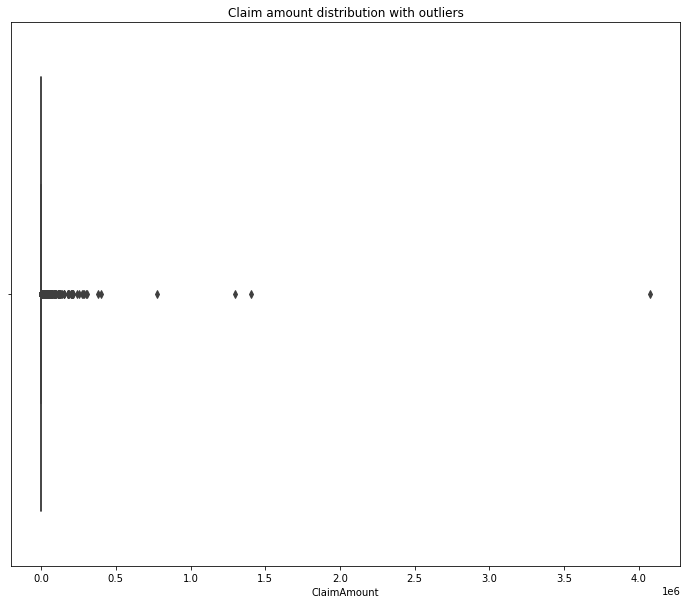

In [26]:
import seaborn as sns
import matplotlib.pyplot  as plt

plt.figure(figsize=(12,10))
plt.title('Claim amount distribution with outliers')
sns.boxplot(x=merged_df["ClaimAmount"],showfliers=True)

<AxesSubplot:title={'center':'one time claim amount distribution (samples less than 2000)'}, xlabel='ClaimAmount'>

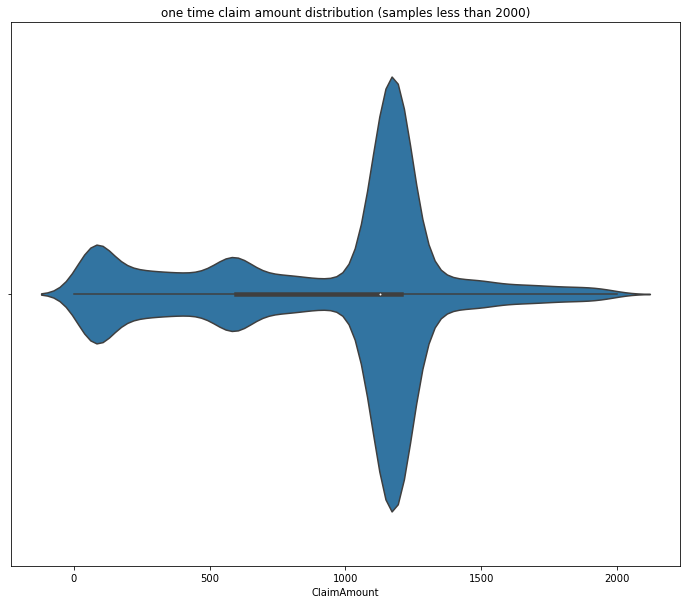

In [27]:
plt.figure(figsize=(12,10))
plt.title('one time claim amount distribution (samples less than 2000)')
sns.violinplot(x='ClaimAmount' ,data =df2[df2['ClaimAmount'] < 2000],split=True)

<AxesSubplot:title={'center':'Cumulative claim amount distribution (samples less than 2000)'}, xlabel='ClaimAmount'>

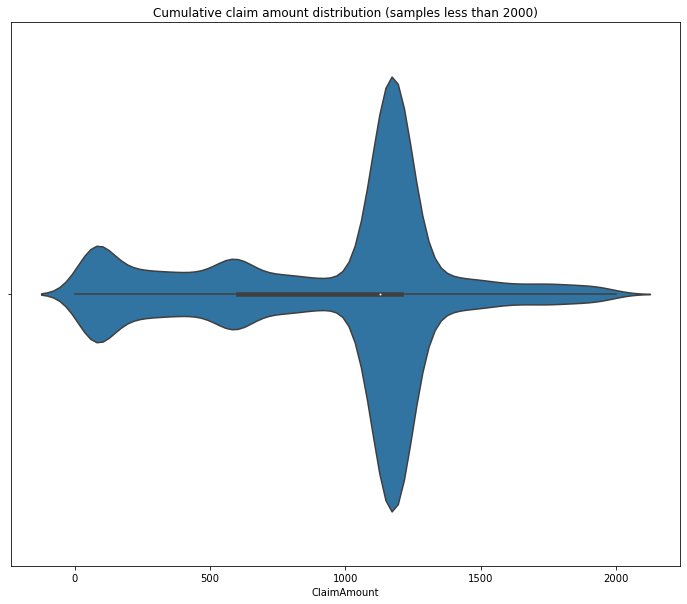

In [28]:
import matplotlib.pyplot  as plt

plt.figure(figsize=(12,10))
plt.title('Cumulative claim amount distribution (samples less than 2000)')
sns.violinplot(x='ClaimAmount' ,data =merged_df[(merged_df['ClaimAmount'] > 0) & (merged_df['ClaimAmount'] < 2000)])

<AxesSubplot:title={'center':'Claim amount distribution by vehicle gas type'}, xlabel='ClaimAmount', ylabel='VehGas'>

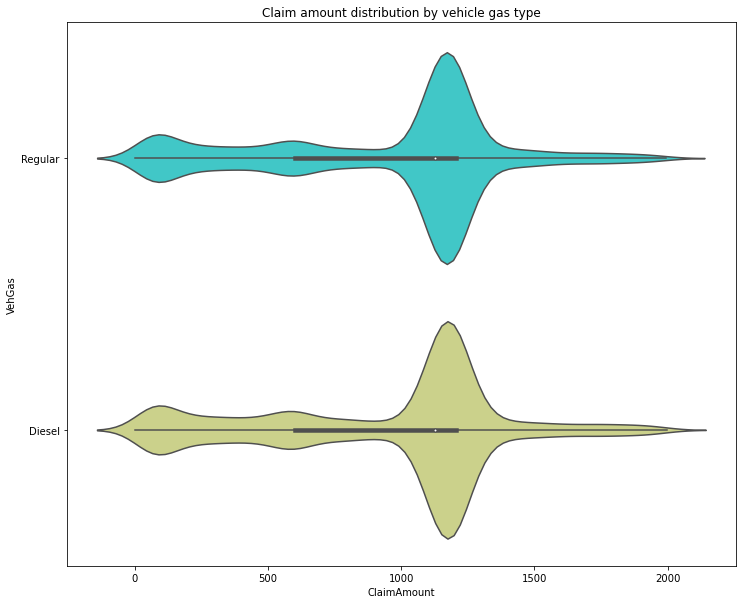

In [29]:
plt.figure(figsize=(12,10))
plt.title("Claim amount distribution by vehicle gas type")
sns.violinplot(y="VehGas", x="ClaimAmount", data = merged_df[(merged_df['ClaimAmount'] > 0) & (merged_df['ClaimAmount'] < 2000)] , orient="h", palette = 'rainbow',scale ='count')

<AxesSubplot:title={'center':'Claim amount distribution by vehicle brand'}, xlabel='ClaimAmount', ylabel='VehBrand'>

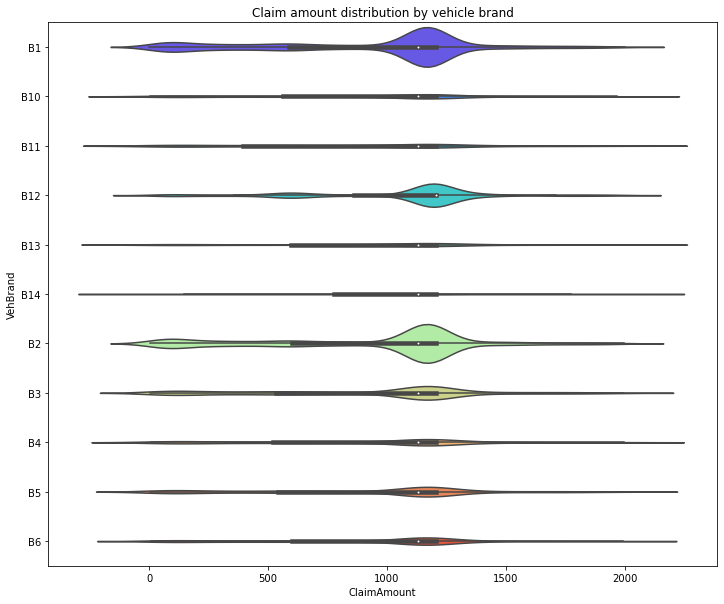

In [30]:
plt.figure(figsize=(12,10))
plt.title('Claim amount distribution by vehicle brand')
sns.violinplot(y="VehBrand", x="ClaimAmount", data = merged_df[(merged_df['ClaimAmount'] > 0) & (merged_df['ClaimAmount'] < 2000)] , orient="h", palette = 'rainbow',scale ='count')

<AxesSubplot:title={'center':'Claim amount distribution by area'}, xlabel='ClaimAmount', ylabel='Area'>

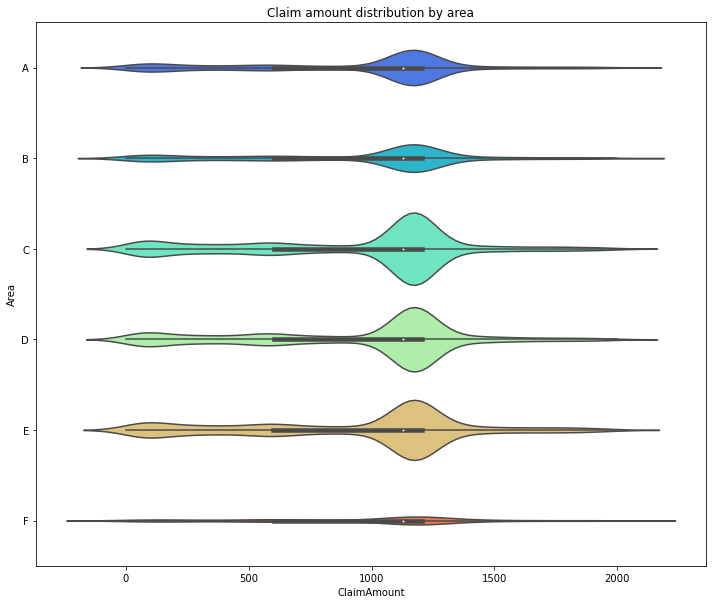

In [31]:
plt.figure(figsize=(12,10))
plt.title('Claim amount distribution by area')
sns.violinplot(y="Area", x="ClaimAmount", data = merged_df[(merged_df['ClaimAmount'] > 0) & (merged_df['ClaimAmount'] < 2000)] , orient="h", palette = 'rainbow', scale ='count')

C:\Users\patil\AppData\Local\Temp\ipykernel_21744\2112778351.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:title={'center':'Feature corelation plot'}>

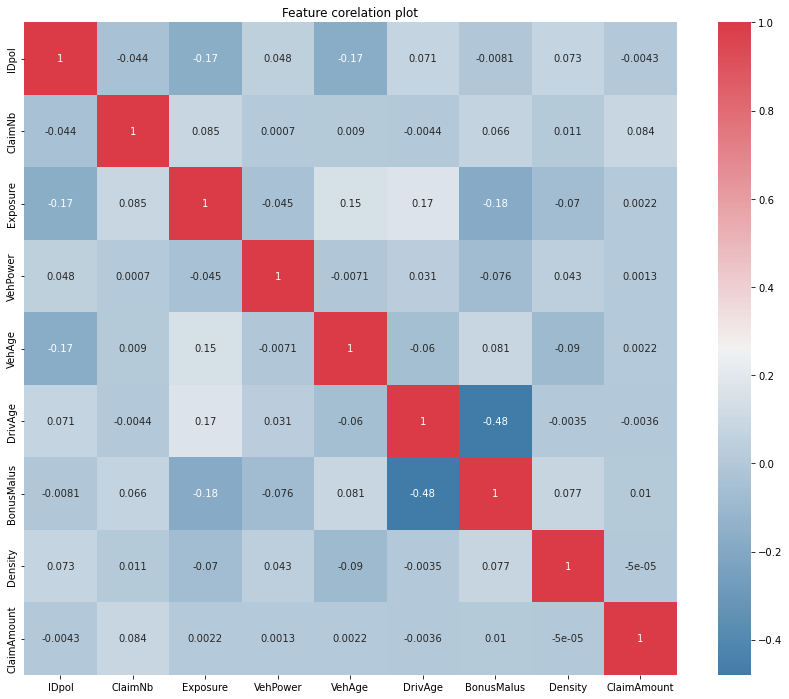

In [32]:
corr = merged_df.corr()
plt.figure(figsize=(15,12))
plt.title('Feature corelation plot')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, annot=True)


<AxesSubplot:title={'center':'BonusMalus w.r.t driver age'}, xlabel='BonusMalus', ylabel='DrivAge'>

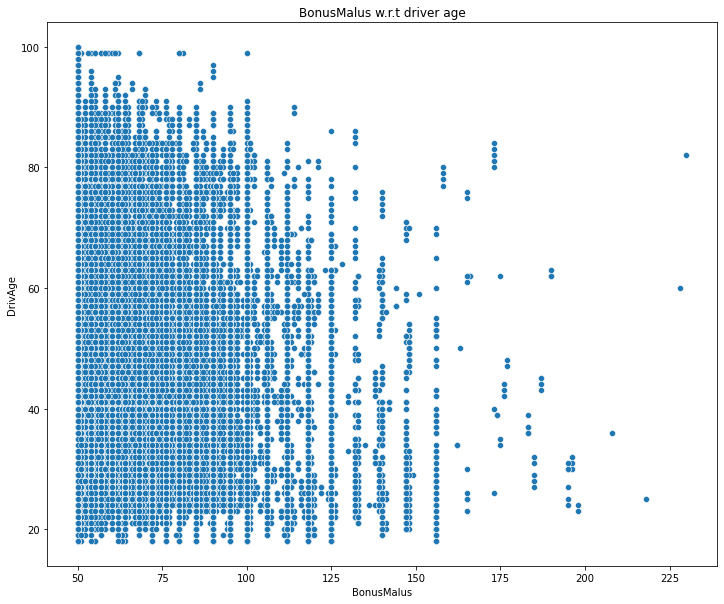

In [33]:
plt.figure(figsize=(12,10))
plt.title('BonusMalus w.r.t driver age')
sns.scatterplot(y='DrivAge',x = 'BonusMalus', data  = df1)

Exposure = 0.08441805430606242
VehAge = 1.149848934200024
DrivAge = 0.4377502361471671
BonusMalus = 1.726665161716436
Density = 4.656539360279465


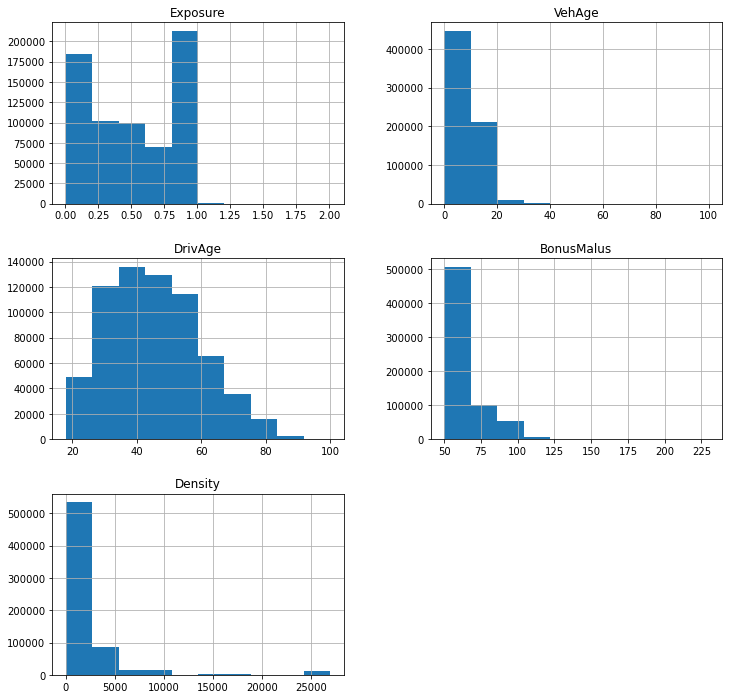

In [34]:
merged_df[numerical_variables].hist(figsize=(12, 12))
from scipy.stats import skew 
for i in numerical_variables:
    print(i + " =", skew(merged_df[i]))

## Data Engineering

In [36]:
from scipy.stats import boxcox
import matplotlib.pyplot  as plt
bc_result = boxcox(merged_df.Density)
merged_df['Density']= bc_result[0]
skew(bc_result[0])

0.0033228849696291182

In [37]:
merged_df['BonusMalus'] = np.log(merged_df['BonusMalus'])
skew(merged_df['BonusMalus'])

1.3588685400293523

In [38]:
categorical_variables.append('VehGas')
onehot_encoded_df = pd.get_dummies(merged_df[categorical_variables],drop_first=True)
merged_df =pd.concat([merged_df, onehot_encoded_df], axis=1).drop(categorical_variables,axis=1)
meged_df_target = merged_df["ClaimAmount"].reset_index().drop('index',axis=1)
merged_df1 = merged_df.drop(['IDpol','ClaimAmount'], axis=1)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_df_scaled = pd.DataFrame(scaler.fit_transform(merged_df1), columns=merged_df1.columns)
merged_df_scaled = pd.concat([merged_df_scaled,meged_df_target],axis =1)

## Training

In [40]:
#plotting function
def plot(actual,prediction,title:str):  
    f = plt.figure(figsize=(12,10))
    ax = plt.axes()

    ax.plot(actual,prediction,marker='o', ls='', ms=3.0)

    lim = (0, actual.max())

    ax.set(xlabel='Actual Price', 
           ylabel='Predicted Price', 
           xlim=lim,
           ylim=lim,
           title=title);

    diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

In [41]:
from sklearn.model_selection import train_test_split


X = merged_df_scaled.drop(['ClaimAmount'], axis=1)
y= merged_df_scaled['ClaimAmount']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear reg

In [42]:
from sklearn.metrics import r2_score,mean_squared_error
from numpy import sqrt
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train,y_train)
print("r2 error = " + str(lr.score(X_train,y_train)))

r2 error = 0.005350465658700787


In [43]:
y_pred= lr.predict(X_val)
print("RMSE = " + str(sqrt(mean_squared_error(y_pred,y_val))))
print("r2 error = " + str(r2_score(y_pred,y_val)))

RMSE = 2066.0495180630683
r2 error = -16.255115188437685


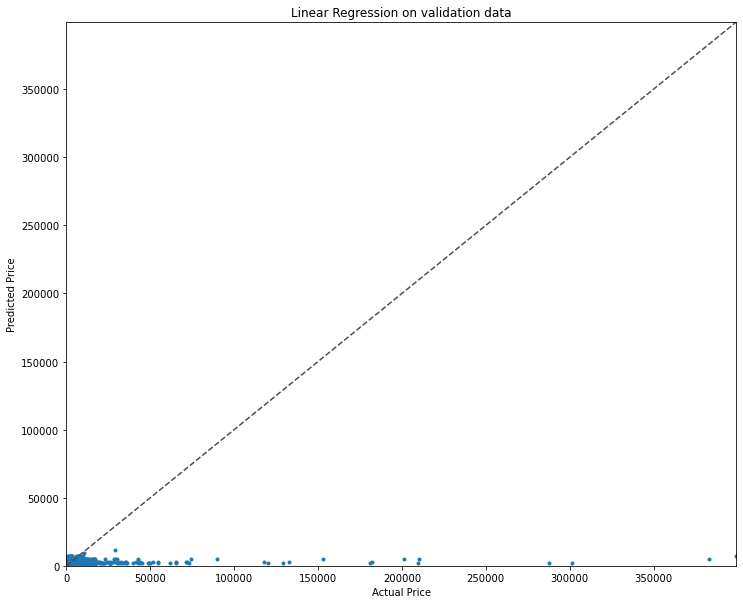

In [44]:
plot(y_val,y_pred,"Linear Regression on validation data")

#### Random Forest reg

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42, n_jobs = -1).fit(X_train,y_train)
y_pred_rf= rf.predict(X_val)
print("RMSE = " + str(sqrt(mean_squared_error(y_pred_rf,y_val))))
print("r2 error = " + str(r2_score(y_pred_rf,y_val)))

RMSE = 2934.509404059083
r2 error = -0.818100649206724


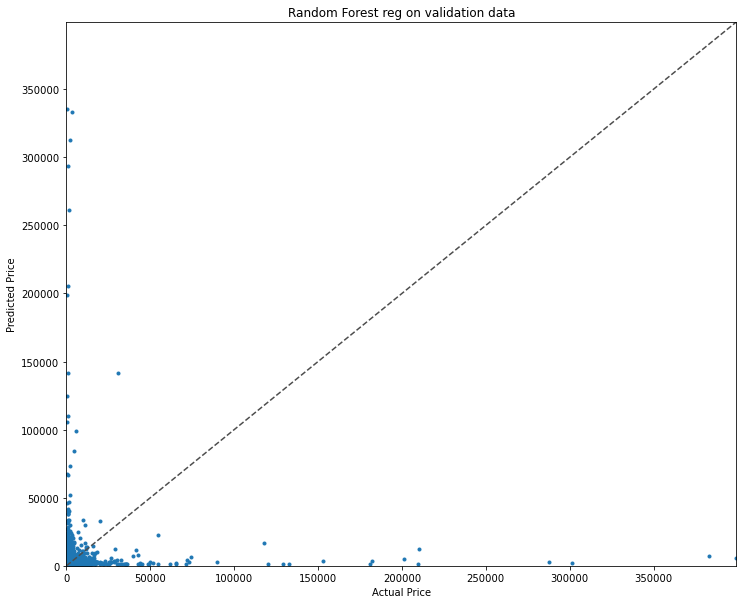

In [46]:
plot(y_val,y_pred_rf,"Random Forest reg on validation data")

## Ignoring anomaly 

In [47]:
merged_df_scaled_2 = merged_df_scaled[(merged_df_scaled['ClaimAmount'] < 2000 )]

In [48]:
X = merged_df_scaled_2.drop(['ClaimAmount'], axis=1)
y= merged_df_scaled_2['ClaimAmount']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear reg

In [49]:
lr=LinearRegression().fit(X_train,y_train)
print("r2 error = " + str(lr.score(X_train,y_train)))

r2 error = 0.8051613645425169


In [50]:
y_pred= lr.predict(X_val)
print("RMSE = " + str(sqrt(mean_squared_error(y_pred,y_val))))
print("r2 error = " + str(r2_score(y_pred,y_val)))

RMSE = 81.00866171243376
r2 error = 0.755039269849875


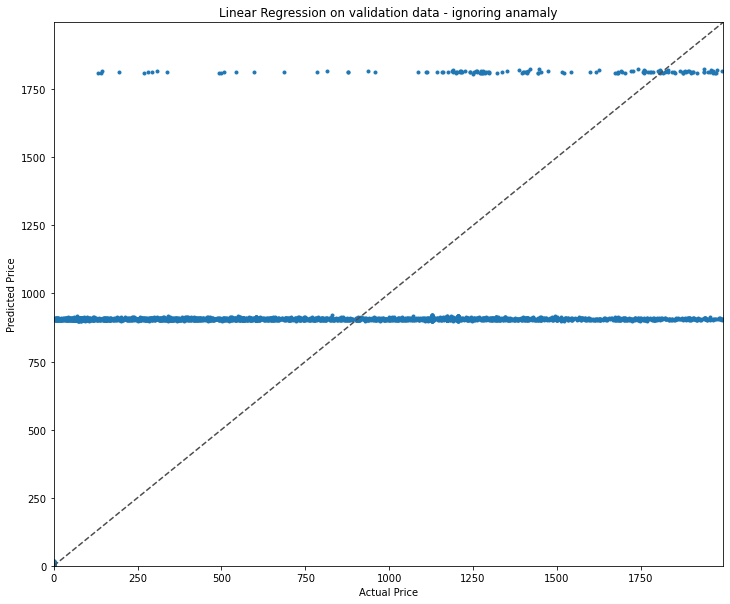

In [51]:
plot(y_val,y_pred,"Linear Regression on validation data - ignoring anamaly")

#### Random Forest reg

In [52]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 42, n_jobs =-1).fit(X_train,y_train)
y_pred_rf= rf.predict(X_val)
print("RMSE = " + str(sqrt(mean_squared_error(y_pred_rf,y_val))))
print("r2 error = " + str(r2_score(y_pred_rf,y_val)))

RMSE = 82.15285699192208
r2 error = 0.7513444661131687


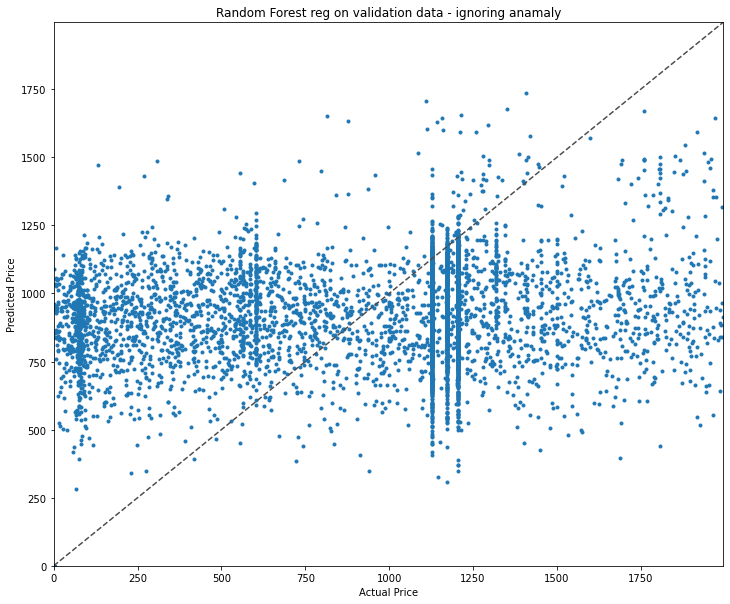

In [53]:
plot(y_val,y_pred_rf,"Random Forest reg on validation data - ignoring anamaly")

<BarContainer object of 44 artists>

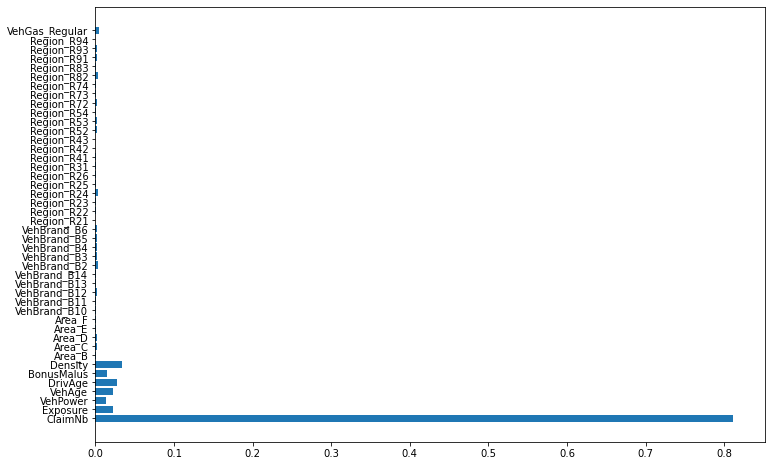

In [54]:
plt.figure(figsize=(12,8))
plt.barh(X.columns, rf.feature_importances_)